# Investigate Network

Load a hand-drawn network to investigate properties of label propagation

In [1]:
import networkx as nx
import time
import math
import numpy as np
import scipy.stats
import itertools
import matplotlib.pyplot as plt
from matplotlib import animation

from mirai import *

In [2]:
def load_network(path):
    G = nx.read_graphml(path)
    for node in G.nodes:
        G.node[node]['stabilized'] = False
        G.node[node]['previous_label'] = G.node[node]['random_label']
        G.node[node]['previous_previous_label'] = G.node[node]['previous_label']
    return G

In [7]:
#G = load_network("basic_xml.graphml")
n, k = 100, 1
#c = 1
#p1 = (c * math.log(n)) / n
#p2 = 0.6 / n
# values that satisfy Theorem 2
c, p1, p2 = 0.00044, 0.466, 0.13
m = -1

G, pos = initialize_graph(n, p1)
G, pos = incorporate_graph(G, n, p1, p2, k)

available stab colors set()
available not stab colors {0, 1}
available stab colors set()
available not stab colors {0, 1}
available stab colors {0, 1}
available not stab colors {0, 1}
available stab colors {0, 1}
available not stab colors {0, 1}
available stab colors {0, 1}
available not stab colors {0, 1}
available stab colors {0, 1}
available not stab colors {0, 1}
stopping label propagation due to convergence  True at the 6 th step 5
.available stab colors {0, 1}
available not stab colors set()
stopping label propagation due to convergence  True at the 7 th step 5
.available stab colors {0, 1}
available not stab colors set()
stopping label propagation due to convergence  True at the 8 th step 5
.available stab colors {0, 1}
available not stab colors set()
stopping label propagation due to convergence  True at the 9 th step 5
.available stab colors {0, 1}
available not stab colors set()
time to run 17.74884843826294


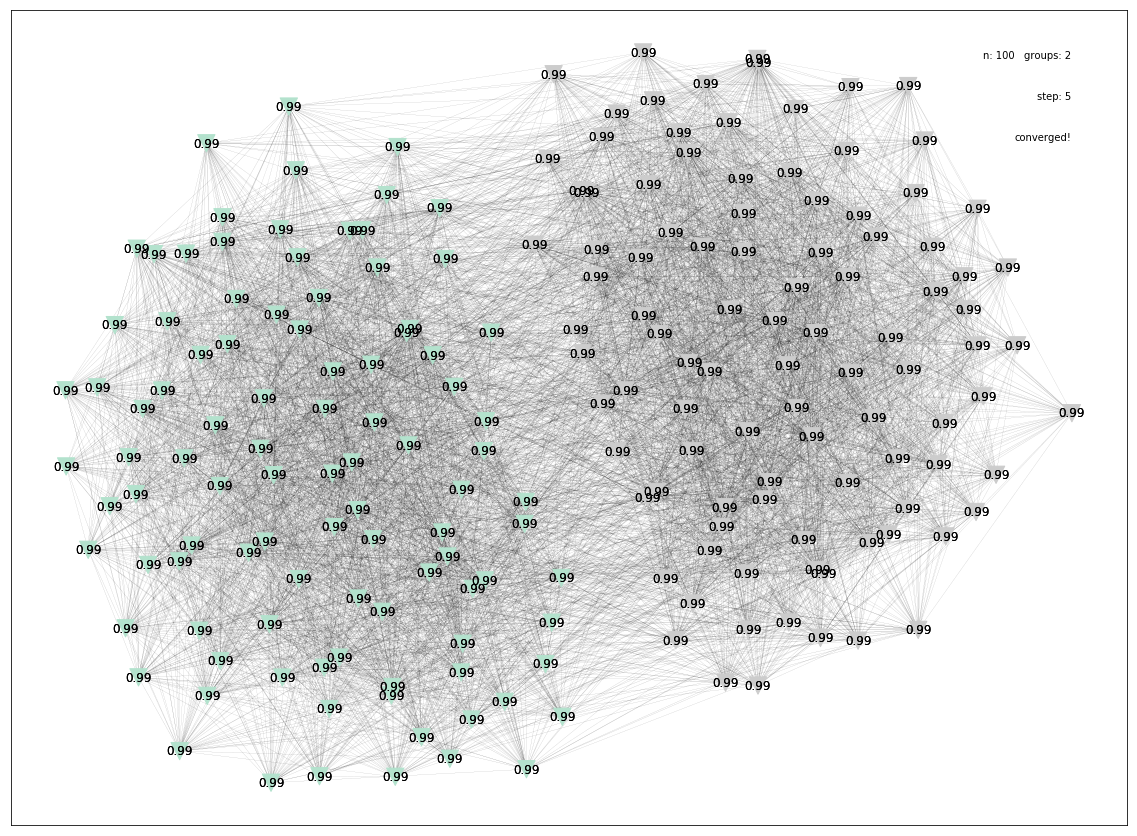

In [6]:
# had difficulty drawing;
# ax needs to be in same cell
fig, ax = plt.subplots(figsize=(20,15))
   
# init function for redraw to reduce computation
def init_function():
    return G, labels

# animate graph where i is frame number
def animate(i, G, labels):
    ax.clear()
    global n, k, m, converged
    m = m + 1
    
    if not converged and i > 1:
        previous_previous_labels = label_choice(G, 'previous_previous_label')
        previous_labels = label_choice(G, 'previous_label')
        current_labels = label_choice(G, 'random_label')
        converged = convergence(i, previous_previous_labels, previous_labels, current_labels)
        
        labels = label_propagation(G, i, labels)
        #print("propagating labels at", i+1, "th round", labels)
        
    elif i == 0:
        labels = {}
        for node in G.nodes:
            labels[node] = round(G.node[node]['random_label'], 2)
        #print("initializing labels at", i, "th round", labels)
    
    elif i == 1:
        labels = label_propagation(G, i, labels)
        #print("propagating labels at", i+1, "th round", labels)
    
    if converged:
        m = m - 1
        print("stopping label propagation due to convergence ", converged, "at the", i, "th step", m)
        print('.', sep='', end='')
    
    stabilized = [ i for i in G.nodes if G.node[i]['stabilized'] == True]
    not_stabilized = [ i for i in G.nodes if G.node[i]['stabilized'] == False]
    colors = [ G.node[i]['group'] for i in G.nodes]
    #stab_colors = [ G.node[i]['group'] for i in stabilized]
    #not_stab_colors = [ G.node[i]['group'] for i in not_stabilized]
    #print("colors", colors)
    stab_colors = [ colors[i] for i in stabilized ]
    not_stab_colors = [ colors[i] for i in not_stabilized ]
    print("available stab colors", set(stab_colors))
    print("available not stab colors", set(not_stab_colors))
    
    nx.draw_networkx(G, pos=pos, nodelist = stabilized, node_shape = 'v',
                     labels=labels, with_labels=True, node_color = stab_colors, 
                     width=0.03, cmap=plt.get_cmap('Pastel2'), ax=ax)
    
    nx.draw_networkx(G, pos=pos, nodelist = not_stabilized, node_shape = 'o',
                     labels=labels, with_labels=True, node_color = not_stab_colors, 
                     width=0.03, cmap=plt.get_cmap('Pastel2'), ax=ax)
    
    ax.text(0.95, 0.95, "n: "+str(n)+"   groups: "+str(k+1), ha="right", va="top", transform=plt.gca().transAxes)
    ax.text(0.95, 0.90, "step: "+str(m), ha="right", va="top", transform=plt.gca().transAxes)
    if converged:
        ax.text(0.95, 0.85, "converged!", ha="right", va="top", transform=plt.gca().transAxes)
    
    return G, labels

labels = {}
converged, convergedS2 = False, False

colors = [ G.node[i]['group'] for i in G.nodes]

# call the animator.  blit=True means only re-draw the parts that have changed.
# interval is in ms, doesn't work?
start_time = time.time()
anim = animation.FuncAnimation(fig, animate, init_func=init_function,
                               fargs=(G, labels),
                               frames=10, interval=10000, repeat=False, blit = False)

aniWriter = animation.FFMpegWriter(fps=0.5)
anim.save('basic_animation.mp4', writer=aniWriter)

end_time = time.time()
program_time = end_time - start_time 
print("time to run", program_time)
plt.show()

In [5]:
G, pos = G[0], G[1]

In [6]:
print(G.node[0])

{'group': 0, 'label': 0, 'stabilized': False, 'random_label': 0.9355638812196369, 'previous_label': 0.9355638812196369, 'previous_previous_label': 0.9355638812196369}


In [8]:
nx.write_graphml(G, 'S2_n100.graphml')